# Taxi Trips EDA

Background on the Automatidata scenario

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 

***

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Course 2 Automatidata project

Do you mind importing the data (attached) and reviewing it for the team? It would be fantastic if you could include a summary of the column Dtypes, data value nonnull counts, relevant and irrelevant columns, along with anything else code related you think is worth showing in the notebook

For this project, you’ll be utilizing data records from yellow taxi trips in New York City during 2017.

In [2]:
df1 = pd.read_csv("nyctaxi.csv", low_memory=False, parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df1.head()

,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,35634249,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,38942136,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [5]:
df1.dtypes.value_counts()

float64           8
int64             7
datetime64[ns]    2
object            1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df1.describe(include=["int", "float"])

,ID,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
mean,56758486.17,1.56,1.64,2.91,1.04,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,32744929.49,0.50,1.29,3.65,0.71,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,12127.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,28520556.00,1.00,1.00,0.99,1.00,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75
50%,56731504.00,2.00,1.00,1.61,1.00,162.00,162.00,1.00,9.50,0.00,0.50,1.35,0.00,0.30,11.80
75%,85374524.00,2.00,2.00,3.06,1.00,233.00,233.00,2.00,14.50,0.50,0.50,2.45,0.00,0.30,17.80
max,113486300.00,2.00,6.00,33.96,99.00,265.00,265.00,4.00,999.99,4.50,0.50,200.00,19.10,0.30,1200.29


In [7]:
# Descriptive Statistical Analysis
df1.describe(include=["object","datetime64"])

,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,22699,22699,22699
unique,22435,22451,2
top,2017-02-01 21:08:00,2017-11-08 22:34:00,N
freq,3,3,22600
first,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN
last,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN


In [8]:
df1.columns

Index(['ID', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

In [9]:
df1.shape

(22699, 18)

Will the available information be sufficient to achieve the goal based on your intuition and the analysis of the variables?

Possible sufficient.

How would you build summary dataframe statistics and assess the min and max range of the data?

Describe function.

Do the averages of any of the data variables look unusual? Can you describe the interval data?

None at all.

***

## Course 3 Automatidata project

We’re ready to perform EDA on the taxi data from TLC to get a general understanding of what taxi ridership looks like. Has Deshawn told you what the management team expects when it comes to EDA? If not, think of it as a “show your work” kind of report. They will want to see a Python notebook showing the structuring and cleaning you did, as well as any matplotlib/seaborn visualizations you plotted to help us understand the data. I would suggest at the very least a box plot of the ride durations and some time series plots, like a breakdown by quarter or month? Whatever you think makes most sense. 

In [10]:
# Is there any missing or incomplete data? 
df1.isnull().sum()

ID                       0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Do you need to add more data using the EDA practice of joining? What type of structuring needs to be done to this dataset, such as filtering, sorting, etc.?

No need extra data. Need to perform feature engineering of new variables. Treat outliers and duplicates.

What initial assumptions do you have about the types of visualizations that might best be suited for the intended audience?

Line + Bar + Scatter + Box Plots

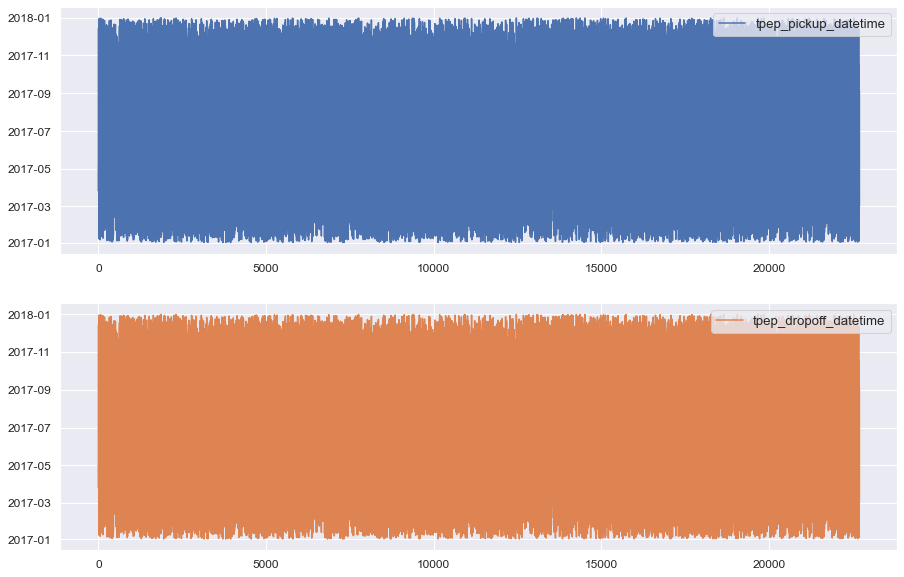

In [11]:
df1[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].plot(subplots = True, 
                                                                        figsize=(15, 10), 
                                                                        sharex=False, 
                                                                        sharey=False,
                                                                        kind="line")
plt.show()

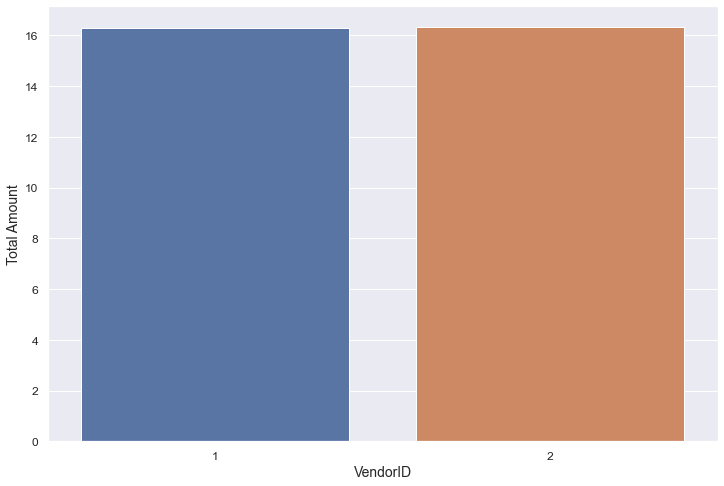

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x="VendorID", y="total_amount", data=df1, ci=None)
#plt.title('Title of the first chart')
#plt.tick_params('x', labelrotation=45)
plt.xlabel("VendorID")
plt.ylabel("Total Amount")
plt.show()

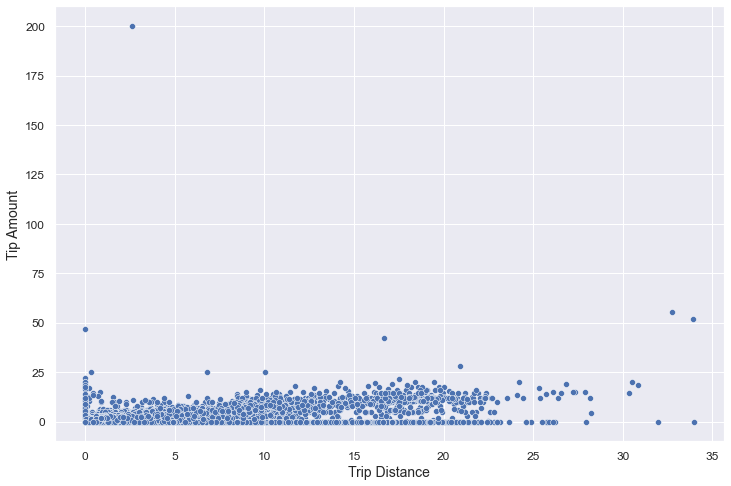

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="trip_distance", y="tip_amount", data=df1, ci=None)
#plt.title('Title of the first chart')
#plt.tick_params('x', labelrotation=45)
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount")
plt.show()

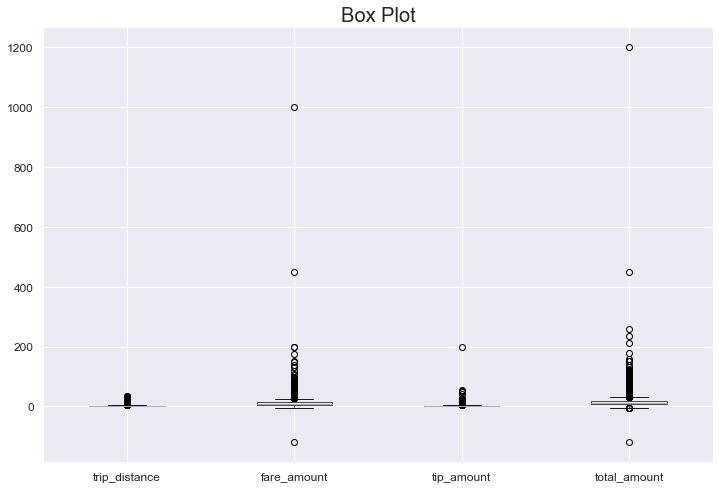

In [15]:
df1[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']].boxplot(figsize=(12, 8))
plt.title('Box Plot', size = 20)
plt.show()

***

In [16]:
-------------

SyntaxError: invalid syntax (1241381794.py, line 1)

## Import Data

In [ ]:
df = pd.read_csv("nyctaximod.csv", low_memory=False)

## Data Quick Glance

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.dtypes.value_counts()

In [ ]:
# Descriptive Statistical Analysis
df.describe(include="all")

In [ ]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

In [ ]:
df.columns

In [ ]:
df.shape

***

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [ ]:
df = df.sample(frac=0.15)

In [ ]:
df

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.sort_values(by = "duration", ascending=True)

In [ ]:
df.duration.value_counts().sort_values(ascending=False).to_frame()

In [ ]:
df.duration.value_counts().nlargest(10).plot(kind="bar")
plt.title("Common Trip Duration", size=15)
plt.show()

In [ ]:
df.duration.unique()

In [ ]:
df.nunique(dropna = False)

## Groupby Function

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>


In [ ]:
df.columns

In [ ]:
vendorid = df.groupby(["vendorid2"], as_index=True)["duration"].mean().to_frame()
vendorid

In [ ]:
vendorid.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.show()

In [ ]:
payment1 = df.groupby(['paymenttype1'], as_index=False)["duration"].mean()
payment1.head()

In [ ]:
payment1.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

In [ ]:
payment2 = df.groupby(['paymenttype2'], as_index=False)["duration"].mean()
payment2

In [ ]:
payment2.plot(kind = "barh", figsize = (12,5), fontsize = 12)
plt.show()

In [ ]:
df.duration.describe()

In [ ]:
plt.hist(x=df.duration, bins=20, range=(0,2500))
plt.show()

In [ ]:
bins = [0, 400, 800, 1200, 1600, 2000, 2400]

In [ ]:
cuts = pd.cut(x=df.duration, bins=bins, include_lowest=True)

In [ ]:
df["durationgroup"] = cuts

In [ ]:
df.head()

In [ ]:
durationrange = df.groupby(["durationgroup"])['passengercount', 'tripdistance', 'fareamount', 'tipamount', 'totalamount'].mean()

In [ ]:
durationrange.plot(kind = "bar", figsize = (12,5), fontsize = 12)
plt.title("By Duration Groups", size=15)
plt.show()

***

## Pivot Tables

<p>This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

In [ ]:
df.columns

In [ ]:
a = df.pivot_table(index=None, columns=['pulocationid237', 'pulocationid161', 'pulocationid236', 'pulocationid186', 'pulocationid162'], 
               values="duration").unstack()

a

In [ ]:
pd.DataFrame(a, columns=["Mean"])

In [ ]:
b = df.pivot_table(index=None, columns=['dolocationid161', 'dolocationid236', 'dolocationid237', 'dolocationid230', 'dolocationid170'], 
               values="duration").unstack()

b

In [ ]:
pd.DataFrame(b, columns=["Mean"])

In [ ]:
c = df.pivot_table(index=None, columns=['tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2'], 
               values="duration").unstack()

c

In [ ]:
pd.DataFrame(c, columns=["Mean"])

In [ ]:
d = df.pivot_table(index=None, columns=['tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2'], 
               values="duration").unstack()

d

In [ ]:
pd.DataFrame(d, columns=["Mean"])

In [ ]:
df.pivot_table(index="pulocationid237", 
               columns=['tpeppickupdatetimehour0', 'tpeppickupdatetimehour1', 'tpeppickupdatetimehour2'], 
               values="totalamount", margins=True, margins_name="Sum")

In [ ]:
df.pivot_table(index="pulocationid237", 
               columns=['tpepdropoffdatetimehour0', 'tpepdropoffdatetimehour1', 'tpepdropoffdatetimehour2'], 
               values="totalamount", margins=True, margins_name="Sum")

## Crosstab

In [ ]:
pd.crosstab(index=df["vendorid2"], columns=df['paymenttype1'])

In [ ]:
pd.crosstab(index=df["vendorid2"], columns=df['paymenttype2'])

***

# Data Visualization

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is Matplotlib.  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.



## Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [ ]:
# Check plot styles
#plt.style.available

## Histogram

### Seaborn Version

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, sharey=False, figsize=(20,15))
fig.suptitle('Histogram', y=1.0, size = 20)

sns.histplot(data=df, x=df.duration, y=None, hue=None, ax=ax1)
#ax1.set_title("Title")
ax1.set(xlabel="duration", ylabel="y")


sns.histplot(data=df, x=df.tripdistance, y=None, hue=None, ax=ax2)
#ax2.set_title("Title")
ax2.set(xlabel="tripdistance", ylabel="y")

sns.histplot(data=df, x=df.fareamount, y=None, hue=None, ax=ax3)
#ax3.set_title("Title")
ax3.set(xlabel="fareamount", ylabel="y")

sns.histplot(data=df, x=df.tipamount, y=None, hue=None, ax=ax4)
#ax4.set_title("Title")
ax4.set(xlabel="tipamount", ylabel="y")

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.totalamount, data=df, bins=10)

plt.show()

## Bar Plots

### Seaborn Version

In [ ]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
fig.suptitle('Bar Plots', y=1.0)


sns.barplot(x="vendorid2", y="duration", data=df, ci=None, ax=ax[0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("vendorid2")
ax[0].set_ylabel("")

sns.barplot(x="paymenttype1", y="duration", ci=None, data=df, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("paymenttype1")
ax[1].set_ylabel("")

sns.barplot(x="paymenttype2", y="duration", ci=None, data=df, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("paymenttype2")
ax[2].set_ylabel("")

sns.barplot(x="passengercount", y="duration", ci=None, data=df, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("passengercount")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Plot 2 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(16,10))
fig.suptitle('Bar Plots')

sns.barplot(x="tpeppickupdatetimehour0", y="duration", data=df, ci=None, ax=ax[0,0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0,0].set_xlabel("tpeppickupdatetimehour0")
ax[0,0].set_ylabel("")

sns.barplot(x="tpeppickupdatetimehour1", y="duration", data=df, ci=None, ax=ax[0,1])
#ax[0,1].set_title('Title of the second chart')
#ax[0,1].tick_params('x', labelrotation=45)
ax[0,1].set_xlabel("tpeppickupdatetimehour1")
ax[0,1].set_ylabel("")

sns.barplot(x="tpeppickupdatetimehour2", y="duration", data=df, ci=None, ax=ax[1,0])
#ax[1,0].set_title('Title of the first chart')
#ax[1,0].tick_params('x', labelrotation=45)
ax[1,0].set_xlabel("tpeppickupdatetimehour2")
ax[1,0].set_ylabel("")

#sns.barplot(x="pulocationid186", data=df)
#ax[1,1].set_title('Title of the second chart')
#ax[1,1].tick_params('x', labelrotation=45)
#ax[1,1].set_xlabel("")
#ax[1,1].set_ylabel("")


plt.tight_layout()
plt.show()

## Scatter Plots

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

### Seaborn Version

In [ ]:
# Plot 2 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(16,10))
fig.suptitle('Scatter Plots')

sns.scatterplot(x="tripdistance", y="duration", data=df, ci=None, ax=ax[0,0])
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0,0].set_xlabel("tripdistance")
ax[0,0].set_ylabel("")

sns.scatterplot(x="fareamount", y="duration", data=df, ci=None, ax=ax[0,1])
#ax[0,1].set_title('Title of the second chart')
#ax[0,1].tick_params('x', labelrotation=45)
ax[0,1].set_xlabel("tpeppickupdatetimehour1")
ax[0,1].set_ylabel("")

sns.scatterplot(x="tipamount", y="duration", data=df, ci=None, ax=ax[1,0])
#ax[1,0].set_title('Title of the first chart')
#ax[1,0].tick_params('x', labelrotation=45)
ax[1,0].set_xlabel("tipamount")
ax[1,0].set_ylabel("")

sns.scatterplot(x="totalamount", y="duration", data=df, ci=None, ax=ax[1,1])
#ax[1,1].set_title('Title of the second chart')
#ax[1,1].tick_params('x', labelrotation=45)
ax[1,1].set_xlabel("totalamount")
#ax[1,1].set_ylabel("")


plt.tight_layout()
plt.show()

## Line Plots

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

In [ ]:
df.head()

### Pandas Method

In [ ]:
df[['tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration']].plot(subplots = True, 
                                                                                figsize=(15, 30), 
                                                                                sharex=False, 
                                                                                sharey=False,
                                                                                kind="line")
plt.show()

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

### Pandas Version

In [ ]:
df[['tripdistance', 'fareamount', 'tipamount', 'totalamount', 'duration']].plot(subplots = True, 
                                                                                figsize=(15, 10), 
                                                                                sharex=False, 
                                                                                sharey=False,
                                                                                kind="box"
                                                                                )

plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Count Plots

### Matplotlib Version

### Seaborn Version

In [ ]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,20))
fig.suptitle('Main Title', y=0.5)

sns.countplot(x="", data=df, ax=ax1)
ax1.set_title('Title of the first chart', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.countplot(x="", data=df, ax=ax2)
ax2.set_title('Title of the second chart', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.countplot(x="", data=df, ax=ax3)
ax3.set_title('Title of the third chart', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.countplot(x="", data=df, ax=ax4)
ax4.set_title('Title of the fourth chart', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

## Rel Plot

To make complex comparisons easier, Seaborn provides a function called relplot, which is short for relationship plot. relplot takes some of the same arguments as scatterplot, such as data, x, y, and hue, but adds other arguments as well. 

### Matplotlib Version

### Seaborn Version

In [ ]:
df.columns

In [ ]:
sns.relplot(x=df.tripdistance, y=df.duration, data=df, hue=df.vendorid2, size=None, col=None)
plt.show()

In [ ]:
sns.relplot(x=df.tipamount, y=df.duration, data=df, hue=df.vendorid2, size=None, col=df.pulocationid237)
plt.show()

In [ ]:
sns.relplot(x=df.tipamount, y=df.duration, data=df, hue=df.vendorid2, size=None, col=df.dolocationid237)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,40))

plt.subplot(4,1,1)
plt.title("", size=20)
sns.relplot(x=df.tripdistance, y=df.duration, data=df, hue=None, size=None, col=None)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,1,2)
plt.title("", size=20)
sns.relplot(x=df.tripdistance, y=df.duration, data=df, hue=None, size=None, col=None)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,1,3)
plt.title("", size=20)
sns.relplot(x=df.tripdistance, y=df.duration, data=df, hue=None, size=None, col=None)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(4,1,4)
plt.title("", size=20)
sns.relplot(x=df.tripdistance, y=df.duration, data=df, hue=None, size=None, col=None)
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## Cat Plots

### Matplotlib Version

### Seaborn Version

In [ ]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='', hue = '', row = '',
            kind='count', data=ratings_df,
            height = 3, aspect = 1)

g.set_xlabels("")
g.set_ylabels("")
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)

plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.catplot(x="calories", y="restaurant",

                hue="is_salad", ci=None,

                data=df_calories, color=None, linewidth=3, showfliers = False,

                orient="h", height=20, aspect=1, palette=None,

                kind="box", dodge=True)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

sns.relplot(x="age", y="eval", hue="gender",
            row="tenure",
            data=ratings_df, height = 3, aspect = 2)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

## Joint Plot

### Matplotlib Version

### Seaborn Version

In [ ]:
sns.jointplot(x='', y='',data=df, kind='scatter')

sns.jointplot(x='', y='',data=df, kind='kde')

sns.jointplot(x='', y='',data=df, kind='hex')

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.jointplot(x='', y='',data=df, kind='reg',scatter_kws={'color':'k'},line_kws={'color':'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

sns.lmplot(x='num_items', y='total_value', data=df, scatter_kws={'s': 1, 'alpha': 0.1}, height=5, aspect=1,
           line_kws={'lw': 2, 'color': 'red'})

plt.tight_layout()
plt.show()

## Heatmap

### Matplotlib Version

### Seaborn Version

In [ ]:
plt.pcolor(df,edgecolors='yellow', vmin=-2, vmax=1)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index) 
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.title("GDP Annual Growth Rate")
plt.show()

## Regression plot

### Matplotlib Version

### Seaborn Version

In [ ]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.wt, y=df.mpg, data=df, ax=ax[0], ci=None, line_kws=line_color)
ax[0].set_title('title')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

sns.regplot(x=df.hum, y=df.cnt, data=df, ax=ax[1], ci=None, line_kws=line_color)
ax[1].set_title('title')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

In [ ]:
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

#Feature

ax1 = sns.regplot(x=X_test.bmi, y=lr_pred, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Plot 1", size=15)

#Feature

ax2 = sns.regplot(x=X_test.s5, y=lr_pred, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Plot 2", size=15)

#Feature

ax3 = sns.regplot(x=X_test.bp, y=lr_pred, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title("Plot 3", size=15)

#Feature

ax4 = sns.regplot(x=X_test.s4, y=lr_pred, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("x")
ax4.set_ylabel("y")
ax4.set_title("Plot 4", size=15)
plt.suptitle('Regression Plots', x=0.5, y=0.9, ha='center', fontsize=20)
plt.show()

## FacetGrid

### Matplotlib Version

### Seaborn Version

In [ ]:
#df.columns

In [ ]:
g = sns.FacetGrid(data=df, col="column_name", height=3, aspect=1, margin_titles=True)
g.map(plt.scatter, "numeric", "numeric")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(data=df, col="vendorid2", height=3, aspect=1, margin_titles=True)
g.map(plt.hist, "totalamount", color="green")
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(data=df, col="vendorid2", height=3, aspect=1, margin_titles=True)
g.map(plt.hist, "duration", color="red")
g.add_legend()
plt.show()

## Pairplots

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head(1)

In [ ]:
df.columns

In [ ]:
# Take only continous variables

df_cont = df[['tripdistance', 'fareamount', 'tipamount', 
              'totalamount', 'duration']]

In [ ]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df_cont.sample(300))
plt.show()

In [ ]:
# Compare to target variable

plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df.sample(300), x_vars=['tripdistance', 'fareamount', 'tipamount', 
              'totalamount'], y_vars=["duration"])
plt.show()

In [ ]:
# For small sample size
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

## Pie Charts

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

### Matplotlib Version

In [ ]:
df.groupby(['txn_description'])["age"].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(x=df.groupby(['txn_description'])["age"].mean(), autopct='%.2f')

plt.show()

### Seaborn Version

In [ ]:
df.head()

In [ ]:
piechartdf = df.groupby(["vendorid2"], as_index=False)["duration"].mean()
piechartdf

In [ ]:
# autopct create %, start angle represent starting point
piechartdf['duration'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=False,       # add shadow      
                            )

plt.title('Title', size=15)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

piechartdf['mpg'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Title', y=1.12, size=20) 

plt.axis('equal') 

# add legend
plt.legend(labels=piechartdf.index, loc='upper left') 

plt.show()

## Tree Plots

### Matplotlib Version

### Seaborn Version

In [ ]:
df.head(1)

In [ ]:
plt.figure(figsize=(20,20))
labels=df['drivewheel']
sizes=df['price']
squarify.plot(sizes=sizes,label=labels, color="green")
plt.plot()

***

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [ ]:
df.corr()

In [ ]:
df.corr()["target"].sort_values()

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

***

#### Python code done by Dennis Lam